In [57]:
# Including necessary data analysis python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Handling alerts seemingly error but not actually an errors it is simply a warning.
import warnings 
warnings.filterwarnings("ignore")

# Handling the plotings so as to be with in the NoteBook window rather than in a separated windows.
%matplotlib inline 
plt.rcParams["figure.figsize"] = 8, 4 # the width 8 and height of 4 is the out put window.

In [103]:
# File path definition 
file_path= "D:\Projects\DataScinece\PRODIGY_DS\Track_03\\bank.csv"

# Reading files using pandas 
customer = pd.read_csv(file_path,delimiter  = ";")

In [105]:
# Displaying the top five rows of the data set
customer.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [35]:
# Check for missing values if there is ...
print(customer.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [106]:
# concise summary of a DataFrame of the data set
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [116]:
# Converting the object data frame type to categorical type 
customer.job = customer.job.astype("category")
customer.marital = customer.marital.astype("category")
customer.education = customer.education.astype("category")
customer.default = customer.default.astype("category")
customer.housing = customer.housing.astype("category")
customer.loan = customer.loan.astype("category")
customer.contact = customer.contact.astype("category")
customer.month = customer.month.astype("category")
customer.poutcome = customer.poutcome.astype("category")
customer.y = customer.y.astype("category")

In [117]:
#The statistical properties of the columns of the training data is:
customer.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


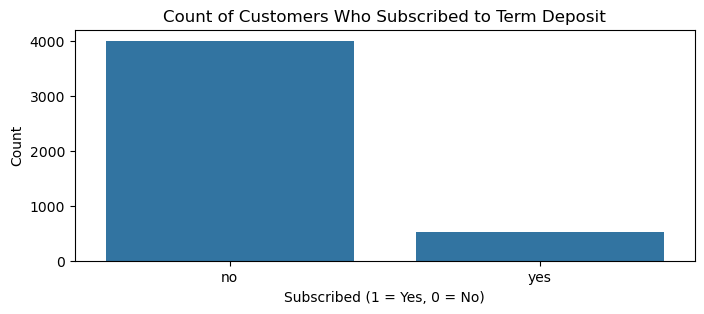

In [133]:
# Count plot for target variable
plt.figure(figsize=(8, 3))
sns.countplot(x='y', data=customer) 
plt.title('Count of Customers Who Subscribed to Term Deposit')
plt.xlabel('Subscribed (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

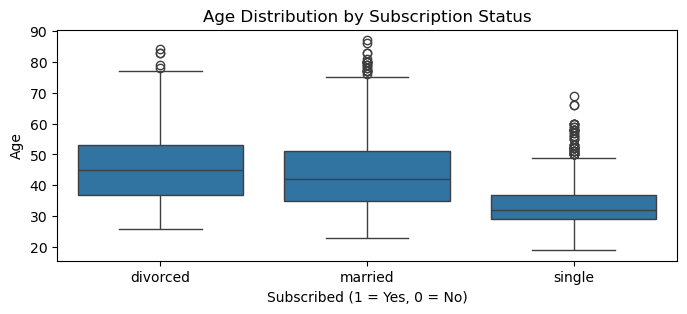

In [134]:
# Visualize relationships
plt.figure(figsize=(8, 3))
sns.boxplot(x='marital', y='age', data=customer)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Subscribed (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

In [120]:
# Identify the categorical columns in the data frame of customer
categorical_columns = customer.select_dtypes(include='category').columns

In [123]:
# Converting the above identified categorical data frmas to a format that is suitable for the classifier machine learning model.
data_encoded = pd.get_dummies(customer, columns=categorical_columns, drop_first=True)
print(data_encoded.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [124]:
# Build the Decision Tree Classifier --- 
# 1. Split the dataset in to features.
X = data_encoded.drop('y_yes', axis=1)       #--- droping the Tvariable and assigning the feature set to x.
y = data_encoded['y_yes']                   # --- assigning the Tvariable we want to be predicted... 

# Split the dataset so that 80% for training and 20% of the dataset will be for testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [79]:
# 2. Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [125]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.93       807
        True       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905



In [126]:
# Print the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_result)

Confusion Matrix:
 [[748  59]
 [ 49  49]]


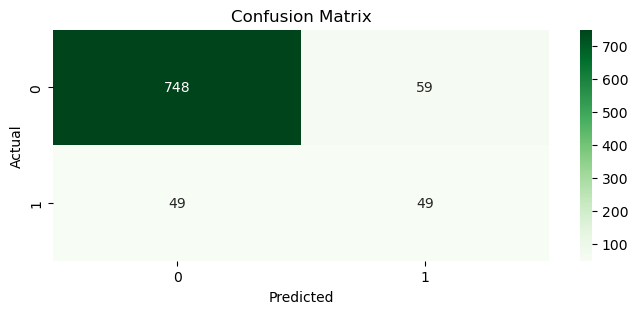

In [135]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 3))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()